# Self-consistency checks for W51-E

Goal: Determine why there are PSF artifacts remaining after a deep clean and self-calibration.

The first few cells are just file naming and loading.  Skip until [next](#Zoom-in-on-W51-e2)

In [2]:
%matplotlib inline
from casatasks import tclean, ft, clearcal, uvsub, split
from casatools import ms, table, msmetadata
from spectral_cube import SpectralCube
import numpy as np
from astropy import units as u, visualization
from astropy.visualization import simple_norm
import pylab as pl
visualization.quantity_support()
ms = ms()
msmd = msmetadata()
tb = table()

In [3]:
cd /orange/adamginsburg/ALMA_IMF/2017.1.01355.L/

/orange/adamginsburg/ALMA_IMF/2017.1.01355.L


In [4]:
original_ms = "W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_selfcal.ms"
experiment_ms_1 = "experiment_w51eb3_1.ms"
experiment_ms_2 = "experiment_w51eb3_2.ms"

In [5]:
for expt in (experiment_ms_1, experiment_ms_2):
    if not os.path.exists(expt):
        split(vis=original_ms,
              outputvis=expt,
              datacolumn='corrected',)

In [6]:
finaliter_prefix = "imaging_results/W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust0_selfcal7_finaliter"
for suffix in (".model.tt0",".model.tt1"):
    assert os.path.exists(finaliter_prefix+suffix)

In [7]:
import warnings
import spectral_cube
warnings.simplefilter('ignore', spectral_cube.utils.BeamWarning)
warnings.simplefilter('ignore', spectral_cube.utils.StokesWarning)

## Zoom in on W51 e2

W51 e2 contains W51 e2e and W51 e2w, which are side-by-side hot-core and HCHII region.

This is the most obvious case of a clear difference between tt0 and tt1.

There is a clear oversubtraction of the tt0 model at W51e2w, at the ~1 mJy level, that doesn't make much sense (why would clean have put extra components there?)

Text(0.5, 1.0, 'model.tt1')

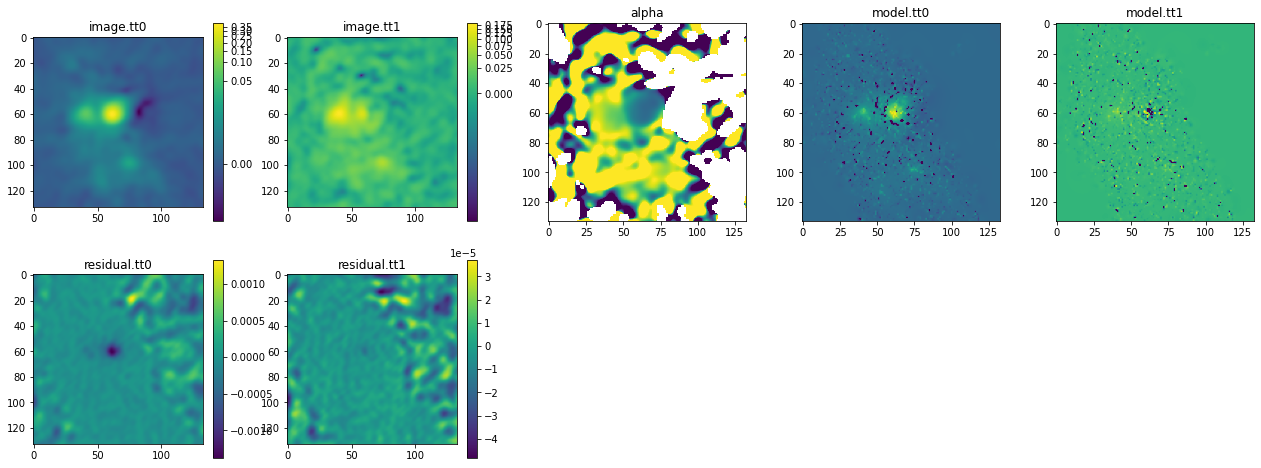

In [8]:
cutoutregion = 'fk5; box(19:23:43.90,+14:30:34.8,5",5")'
pl.figure(figsize=(22,8))
image = SpectralCube.read(f'{finaliter_prefix}.image.tt0', format='casa_image').subcube_from_ds9region(cutoutregion)
pl.subplot(2,5,1).imshow(image[0].value, norm=simple_norm(image[0].value, stretch='log')); pl.colorbar(mappable=pl.gca().images[0])
pl.title("image.tt0")
imagett1 = SpectralCube.read(f'{finaliter_prefix}.image.tt1', format='casa_image').subcube_from_ds9region(cutoutregion)
pl.subplot(2,5,2).imshow(imagett1[0].value, norm=simple_norm(imagett1[0].value, stretch='log')); pl.colorbar(mappable=pl.gca().images[0])
pl.title("image.tt1")
residual = SpectralCube.read(f'{finaliter_prefix}.residual.tt0', format='casa_image').subcube_from_ds9region(cutoutregion)
pl.subplot(2,5,6).imshow(residual[0].value, norm=simple_norm(residual[0].value, stretch='linear')); pl.colorbar(mappable=pl.gca().images[0])
pl.title("residual.tt0")
residualtt1 = SpectralCube.read(f'{finaliter_prefix}.residual.tt1', format='casa_image').subcube_from_ds9region(cutoutregion)
pl.subplot(2,5,7).imshow(residualtt1[0].value, norm=simple_norm(residualtt1[0].value, stretch='linear')); pl.colorbar(mappable=pl.gca().images[0])
pl.title("residual.tt1")
alpha = SpectralCube.read(f'{finaliter_prefix}.alpha', format='casa_image').subcube_from_ds9region(cutoutregion)
pl.subplot(2,5,3).imshow(alpha[0].value, norm=simple_norm(alpha[0].value, stretch='linear', min_cut=-2, max_cut=4));
pl.title("alpha")
model = SpectralCube.read(f'{finaliter_prefix}.model.tt0', format='casa_image').subcube_from_ds9region(cutoutregion)
pl.subplot(2,5,4).imshow(model[0].value, norm=simple_norm(model[0].value, stretch='log', max_percent=99.995, min_percent=1));
pl.title("model.tt0")
modeltt1 = SpectralCube.read(f'{finaliter_prefix}.model.tt1', format='casa_image').subcube_from_ds9region(cutoutregion)
pl.subplot(2,5,5).imshow(modeltt1[0].value, norm=simple_norm(modeltt1[0].value, stretch='log', max_percent=99.995, min_percent=1));
pl.title("model.tt1")

## Look to the north of this source

This is where artifacts are clear, particularly in the residual.

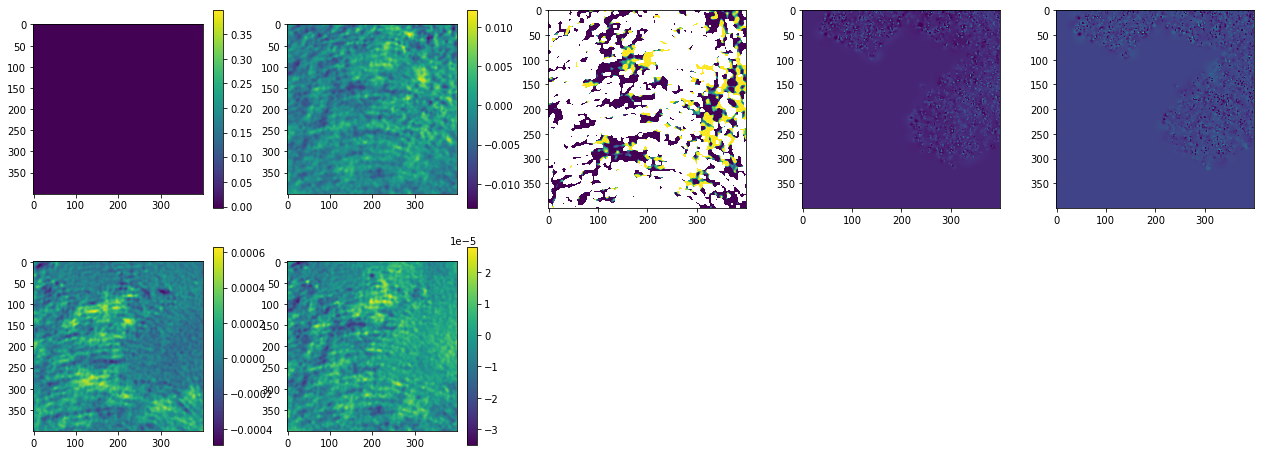

In [9]:
cutoutregion_ = cutoutregion
cutoutregion = 'fk5; box(19:23:43.90,+14:30:59.8,15",15")'
pl.figure(figsize=(22,8))
image_ = SpectralCube.read(f'{finaliter_prefix}.image.tt0', format='casa_image').subcube_from_ds9region(cutoutregion)
pl.subplot(2,5,1).imshow(image_[0].value, norm=simple_norm(image[0].value, stretch='linear')); pl.colorbar(mappable=pl.gca().images[0])
imagett1_ = SpectralCube.read(f'{finaliter_prefix}.image.tt1', format='casa_image').subcube_from_ds9region(cutoutregion)
pl.subplot(2,5,2).imshow(imagett1_[0].value, norm=simple_norm(imagett1_[0].value, stretch='linear')); pl.colorbar(mappable=pl.gca().images[0])
residual_ = SpectralCube.read(f'{finaliter_prefix}.residual.tt0', format='casa_image').subcube_from_ds9region(cutoutregion)
pl.subplot(2,5,6).imshow(residual_[0].value, norm=simple_norm(residual_[0].value, stretch='linear')); pl.colorbar(mappable=pl.gca().images[0])
residualtt1_ = SpectralCube.read(f'{finaliter_prefix}.residual.tt1', format='casa_image').subcube_from_ds9region(cutoutregion)
pl.subplot(2,5,7).imshow(residualtt1_[0].value, norm=simple_norm(residualtt1_[0].value, stretch='linear')); pl.colorbar(mappable=pl.gca().images[0])
alpha_ = SpectralCube.read(f'{finaliter_prefix}.alpha', format='casa_image').subcube_from_ds9region(cutoutregion)
pl.subplot(2,5,3).imshow(alpha_[0].value, norm=simple_norm(alpha_[0].value, stretch='linear', min_cut=-2, max_cut=4));
model_ = SpectralCube.read(f'{finaliter_prefix}.model.tt0', format='casa_image').subcube_from_ds9region(cutoutregion)
pl.subplot(2,5,4).imshow(model_[0].value, norm=simple_norm(model_[0].value, stretch='asinh', max_percent=99.995, min_percent=1));
modeltt1_ = SpectralCube.read(f'{finaliter_prefix}.model.tt1', format='casa_image').subcube_from_ds9region(cutoutregion)
pl.subplot(2,5,5).imshow(modeltt1_[0].value, norm=simple_norm(modeltt1_[0].value, stretch='asinh', max_percent=99.995, min_percent=1));
cutoutregion = cutoutregion_

In [10]:
def restore_modelcolumn(vis, use_tclean=True):
    if use_tclean:
        tclean(vis=vis, selectdata=True, field="W51-E",
           datacolumn="corrected",
           imagename=finaliter_prefix,
           imsize=[4800,  4800], cell=['0.0375arcsec',  '0.0375arcsec'],
           phasecenter="ICRS 290.934083333deg 14.5081943683deg", stokes="I",
           projection="SIN", specmode="mfs", outframe="LSRK", veltype="radio",
           restfreq=[], interpolation="linear", gridder="mosaic", mosweight=True,
           deconvolver="mtmfs", scales=[0,  3,  9], nterms=2, restoration=True,
           weighting="briggs", robust=0, niter=0,  threshold="0.15mJy",
           interactive=False, usemask="user", verbose=True, restart=True,
           savemodel="modelcolumn", calcres=True, calcpsf=False)
    else:
        ft(vis=vis,
           model=[finaliter_prefix+'.model.tt0',
                  finaliter_prefix+'.model.tt1'],
           nterms=2,
           usescratch=True)

In [11]:
image_path = "RestructuredImagingResults/W51-E/B3/manual_checks"
def image_field(vis, outname, field=4, overwrite=False):
    if overwrite:
        os.system(f'rm -r {image_path}/{outname}.*')
    elif os.path.exists(f'{image_path}/{outname}.image.tt0'):
        return
    tclean(vis=vis,
       field=str(field),
       imagename=f'{image_path}/{outname}',
       specmode='mfs',
       datacolumn='corrected',
       deconvolver='mtmfs',
       gridder='standard',
       imsize=[2000, 2000], cell=['0.06arcsec',  '0.06arcsec'],
       #startmodel=['imaging_results/W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust0_selfcal7.model.tt0',
       #            'imaging_results/W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust0_selfcal7.model.tt1'],
       #savemodel='modelcolumn',
       weighting='briggs',
       robust=0,
       nterms=2,
       niter=0,
      )

# Experiment 1: Use tclean to populate the model column

We populate the model column from the `.model.tt0` and `.model.tt1` images using tclean with the exact same parameters used for imaging (same gridder, same imsize, same phasecenter, etc).

We clearcal first to make sure we're really starting from scratch.

`experiment_ms_*` all have the final self-calibrated "corrected" data in their "data" column.

In [ ]:
clearcal(experiment_ms_1)
restore_modelcolumn(experiment_ms_1, use_tclean=True)

Verify that the model is populated by showing some values.  As long as this image is not uniform, the model is populated.

In [ ]:
ms.open(experiment_ms_1); ms.selectinit(12); mod_restore = ms.getdata(['data', 'corrected_data', 'model_data'], ifraxis=True); ms.close()
pl.subplot(2,2,1).imshow(np.abs(mod_restore['model_data'][0,0]))
pl.subplot(2,2,2).imshow(np.abs(mod_restore['model_data'][0,1]))
pl.subplot(2,2,3).imshow(np.abs(mod_restore['model_data'][1,0]))
pl.subplot(2,2,4).imshow(np.abs(mod_restore['model_data'][1,1]))
pl.gca().set_aspect(0.2)

In [ ]:
mod_restore['model_data'].shape

In [28]:
msmd.open(experiment_ms_1);
spws = (msmd.spwsforfield('W51-E'))
freqs = {spw: msmd.chanfreqs(spw) for spw in spws}
msmd.close()

True

In [29]:
for spw in spws:
    ms.open(experiment_ms_1); ms.selectinit(spw); data_check = ms.getdata(['data', 'corrected_data', 'model_data'], ifraxis=True); ms.close()
    x = np.abs(data_check['data']/data_check['model_data'])
    print(spw, freqs[spw], np.nanmean(x[np.isfinite(x)]),     np.nanmedian(x[np.isfinite(x)]))

/orange/adamginsburg/miniconda3/envs/casa61_py36/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


12 [9.31858879e+10 9.31272941e+10] 1.3761297360050386 1.1818558403915707
13 [9.26140019e+10 9.25378301e+10 9.24616582e+10 9.23854863e+10
 9.23093144e+10 9.22331426e+10 9.21569707e+10 9.20807988e+10
 9.20046269e+10 9.19284551e+10 9.18522832e+10 9.17761113e+10] 1.1677226847035052 1.0681702568627744
14 [1.02150770e+11 1.02226942e+11 1.02303114e+11 1.02379286e+11
 1.02455457e+11 1.02531629e+11 1.02607801e+11 1.02683973e+11
 1.02760145e+11 1.02836317e+11 1.02912489e+11 1.02988661e+11] 1.3429184474766689 1.1471659544657764
15 [1.04550367e+11 1.04626539e+11 1.04702711e+11 1.04778883e+11
 1.04855055e+11 1.04931226e+11 1.05007398e+11 1.05083570e+11
 1.05159742e+11 1.05235914e+11 1.05312086e+11 1.05388258e+11] 1.3974366441933805 1.1684939226731683
16 [9.31861940e+10 9.31276003e+10] 10.722744849036804 4.425056368066239


/orange/adamginsburg/miniconda3/envs/casa61_py36/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice
  after removing the cwd from sys.path.
/orange/adamginsburg/miniconda3/envs/casa61_py36/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


17 [9.26142895e+10 9.25381177e+10 9.24619458e+10 9.23857739e+10
 9.23096020e+10 9.22334302e+10 9.21572583e+10 9.20810864e+10
 9.20049145e+10 9.19287427e+10 9.18525708e+10 9.17763989e+10] nan nan
18 [1.02151107e+11 1.02227278e+11 1.02303450e+11 1.02379622e+11
 1.02455794e+11 1.02531966e+11 1.02608138e+11 1.02684310e+11
 1.02760482e+11 1.02836653e+11 1.02912825e+11 1.02988997e+11] 2.2574171433117978 1.2354332570558684
19 [1.04550704e+11 1.04626876e+11 1.04703048e+11 1.04779219e+11
 1.04855391e+11 1.04931563e+11 1.05007735e+11 1.05083907e+11
 1.05160079e+11 1.05236251e+11 1.05312423e+11 1.05388594e+11] nan nan
28 [9.31869642e+10 9.31283705e+10] 4.707204547885207 3.436747007682159
29 [9.26150732e+10 9.25389014e+10 9.24627295e+10 9.23865576e+10
 9.23103857e+10 9.22342139e+10 9.21580420e+10 9.20818701e+10
 9.20056982e+10 9.19295264e+10 9.18533545e+10 9.17771826e+10] nan nan
30 [1.02151968e+11 1.02228140e+11 1.02304312e+11 1.02380484e+11
 1.02456656e+11 1.02532828e+11 1.02609000e+11 1.0268517

/orange/adamginsburg/miniconda3/envs/casa61_py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


(array([1520., 1641., 1798., 1855., 1945., 2056., 2242., 2358., 2472.,
        2531., 2530., 2762., 2874., 3046., 3057., 3297., 3425., 3521.,
        3603., 3731., 3666., 3794., 4082., 3997., 4088., 4057., 4208.,
        4202., 4117., 4010., 4080., 4064., 4055., 3873., 3912., 3801.,
        3754., 3733., 3522., 3490., 3411., 3297., 3170., 3039., 3026.,
        2849., 2802., 2656., 2655.]),
 array([0.5       , 0.52040816, 0.54081633, 0.56122449, 0.58163265,
        0.60204082, 0.62244898, 0.64285714, 0.66326531, 0.68367347,
        0.70408163, 0.7244898 , 0.74489796, 0.76530612, 0.78571429,
        0.80612245, 0.82653061, 0.84693878, 0.86734694, 0.8877551 ,
        0.90816327, 0.92857143, 0.94897959, 0.96938776, 0.98979592,
        1.01020408, 1.03061224, 1.05102041, 1.07142857, 1.09183673,
        1.1122449 , 1.13265306, 1.15306122, 1.17346939, 1.19387755,
        1.21428571, 1.23469388, 1.25510204, 1.2755102 , 1.29591837,
        1.31632653, 1.33673469, 1.35714286, 1.37755102, 1.39795

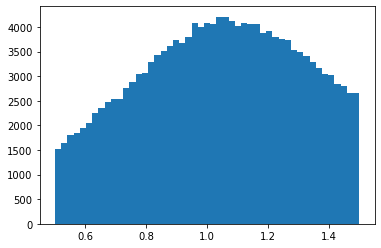

In [22]:
pl.hist(np.abs(mod_restore['data'][0,0]/mod_restore['model_data'][0,0]).ravel(), bins=np.linspace(0.5,1.5))

In [26]:
x = np.abs(mod_restore['data'][0,0]/mod_restore['model_data'][0,0])
np.nanmean(x[np.isfinite(x)])
np.nanmedian(x[np.isfinite(x)])

/orange/adamginsburg/miniconda3/envs/casa61_py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


1.1818558403915707

/orange/adamginsburg/miniconda3/envs/casa61_py36/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


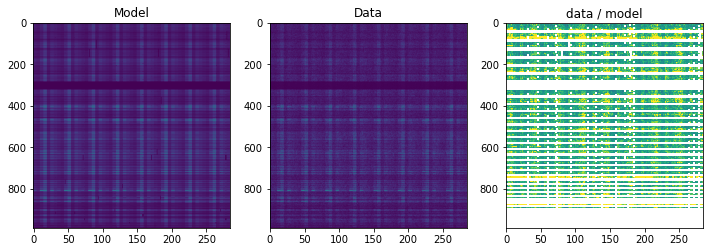

In [16]:
pl.figure(figsize=(12,4))
pl.subplot(1,3,1).imshow(np.abs(mod_restore['model_data'][0,0])); pl.title("Model"); pl.gca().set_aspect(0.3)
pl.subplot(1,3,2).imshow(np.abs(mod_restore['data'][0,0])); pl.title("Data"); pl.gca().set_aspect(0.3)
pl.subplot(1,3,3).imshow(np.abs(mod_restore['data'][0,0]/mod_restore['model_data'][0,0]), vmin=0, vmax=2); pl.title("data / model"); pl.gca().set_aspect(0.3)

## uvsub

We uvsub the model from the data column (which is the self-calibrated data) to obtain a new residual image.  The residual should closely resemble the residual of the original cleaned image.

In [13]:
uvsub(experiment_ms_1)

Verify that the subtraction worked as expected:

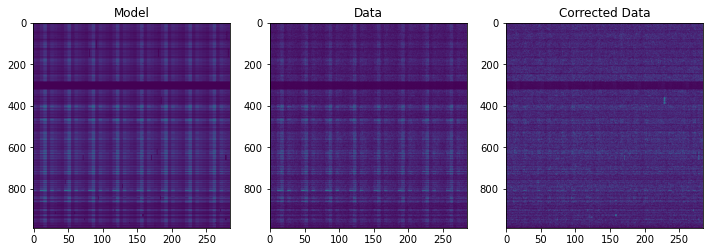

In [14]:
ms.open(experiment_ms_1); ms.selectinit(12); mod_sub = ms.getdata(['data', 'corrected_data', 'model_data'], 
                                                                  xis=True); ms.close()
pl.figure(figsize=(12,4))
pl.subplot(1,3,1).imshow(np.abs(mod_sub['model_data'][0,0])); pl.title("Model"); pl.gca().set_aspect(0.3)
pl.subplot(1,3,2).imshow(np.abs(mod_sub['data'][0,0])); pl.title("Data"); pl.gca().set_aspect(0.3)
pl.subplot(1,3,3).imshow(np.abs(mod_sub['corrected_data'][0,0])); pl.title("Corrected Data"); pl.gca().set_aspect(0.3)

Notably, there _is_ an interesting, bright residual in the corrected_data!  Maybe this is the source of the problem?

Next, we image the data in a few different fields.  field0 is the center pointing, field4 is an offset pointing.

In [15]:
eximname = 'experiment_tcleanrestore_uvsub_field4'
image_field(experiment_ms_1, eximname, field=4)

In [16]:
for field in range(15):
    eximname = f'experiment_tcleanrestore_uvsub_field{field}'
    try:
        image_field(experiment_ms_1, eximname, field=field, overwrite=False)
        print(eximname)
    except RuntimeError:
        continue

experiment_tcleanrestore_uvsub_field0
experiment_tcleanrestore_uvsub_field4
experiment_tcleanrestore_uvsub_field5
experiment_tcleanrestore_uvsub_field6
experiment_tcleanrestore_uvsub_field7
experiment_tcleanrestore_uvsub_field8
experiment_tcleanrestore_uvsub_field9


# Field 4

There's a significant, but still pretty tame, ~2 mJy positive residual at e2w in field 4.

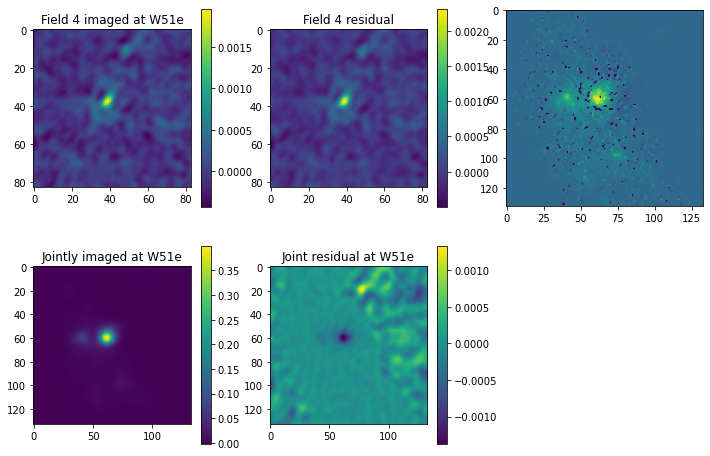

In [17]:
#cutoutregion = 'fk5; box(19:23:43.90,+14:30:34.8,10",10")'
eximname = 'experiment_tcleanrestore_uvsub_field4'
pl.figure(figsize=(12,8))
image_ = SpectralCube.read(f'{image_path}/{eximname}.image.tt0', format='casa_image').subcube_from_ds9region(cutoutregion)
pl.subplot(2,3,1);  pl.imshow(image_[0].value); pl.title("Field 4 imaged at W51e"); pl.colorbar(mappable=pl.gca().images[0])
resid_ = SpectralCube.read(f'{image_path}/{eximname}.residual.tt0', format='casa_image').subcube_from_ds9region(cutoutregion)
pl.subplot(2,3,2);  pl.imshow(resid_[0].value); pl.title("Field 4 residual"); pl.colorbar(mappable=pl.gca().images[0])
#model = SpectralCube.read(f'{image_path}/{eximname}.model.tt0', format='casa_image').subcube_from_ds9region(cutoutregion)
pl.subplot(2,3,3).imshow(model[0].value, norm=simple_norm(model[0].value, stretch='log', max_percent=99.995, min_percent=1));
pl.subplot(2,3,4);  pl.imshow(image[0].value); pl.title("Jointly imaged at W51e"); pl.colorbar(mappable=pl.gca().images[0])
pl.subplot(2,3,5);  pl.imshow(residual[0].value); pl.title("Joint residual at W51e"); pl.colorbar(mappable=pl.gca().images[0])

In [18]:
eximname = 'experiment_tcleanrestore_uvsub_field0'
image_field(experiment_ms_1, eximname, field=0)

# Field 0

The central field, field 0, seems to oversubtract W51e2w, but only by a few mJy.  Strangely, the jointly-imaged original data also show a negative residual, which does not make sense as this does not appear in the very data we're showing...

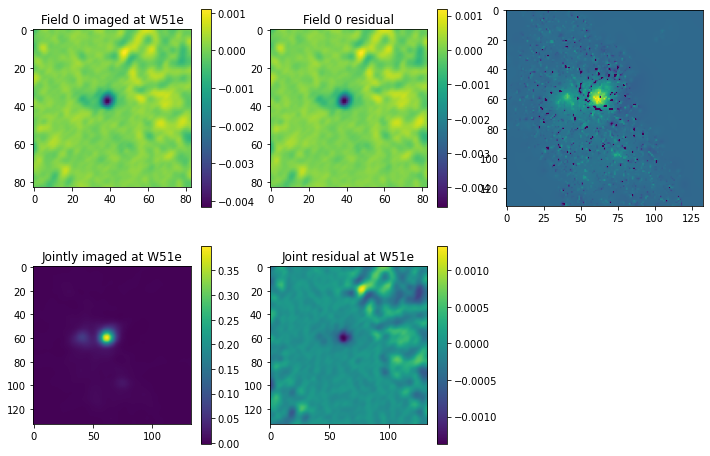

In [19]:
#cutoutregion = 'fk5; box(19:23:43.90,+14:30:34.8,10",10")'
eximname = 'experiment_tcleanrestore_uvsub_field0'
pl.figure(figsize=(12,8))
image_ = SpectralCube.read(f'{image_path}/{eximname}.image.tt0', format='casa_image').subcube_from_ds9region(cutoutregion)
pl.subplot(2,3,1);  pl.imshow(image_[0].value); pl.title("Field 0 imaged at W51e"); pl.colorbar(mappable=pl.gca().images[0])
resid_ = SpectralCube.read(f'{image_path}/{eximname}.residual.tt0', format='casa_image').subcube_from_ds9region(cutoutregion)
pl.subplot(2,3,2);  pl.imshow(resid_[0].value); pl.title("Field 0 residual"); pl.colorbar(mappable=pl.gca().images[0])
#model = SpectralCube.read(f'{image_path}/{eximname}.model.tt0', format='casa_image').subcube_from_ds9region(cutoutregion)
pl.subplot(2,3,3).imshow(model[0].value, norm=simple_norm(model[0].value, stretch='log', max_percent=99.995, min_percent=1));
pl.subplot(2,3,4);  pl.imshow(image[0].value); pl.title("Jointly imaged at W51e"); pl.colorbar(mappable=pl.gca().images[0])
pl.subplot(2,3,5);  pl.imshow(residual[0].value); pl.title("Joint residual at W51e"); pl.colorbar(mappable=pl.gca().images[0])

# Overview

This next figure shows the full fields side-by-side to give an idea of where they are.

These give the impression that the model severely over-predicted in several cases, but again this is nonsense.  This looks more like some sort of failure to account for the primary beam.  However, I can't make it make sense.

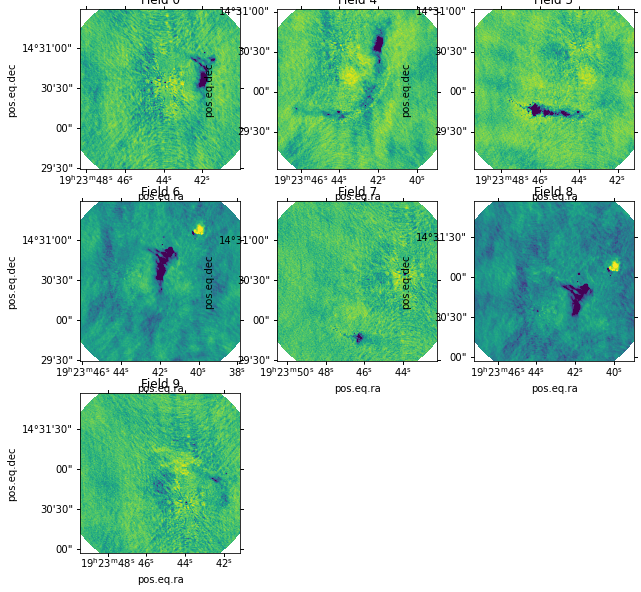

In [24]:
pl.figure(figsize=(10,10))
eximname = 'experiment_tcleanrestore_uvsub_field0'
f0 = SpectralCube.read(f'{image_path}/{eximname}.image.tt0', format='casa_image')[0]
ax = pl.subplot(3,3,1, projection=f0.wcs); ax.imshow(f0.value, norm=simple_norm(f0.value, stretch='asinh', max_percent=99.9, min_percent=1)); pl.title("Field 0")
ii = 2
for field in range(2,15):
    eximname = f'experiment_tcleanrestore_uvsub_field{field}'
    try:
        f4 = SpectralCube.read(f'{image_path}/{eximname}.image.tt0', format='casa_image')[0]
        ax = pl.subplot(3,3,ii, projection=f4.wcs); ax.imshow(f4.value, norm=simple_norm(f4.value, stretch='asinh', max_percent=99.9, min_percent=1))
        pl.title(f"Field {field}")
        ii += 1
    except:
        continue

# Residuals

Now we zoom in on the residuals centered on W51e2 for all fields.

The left column in all of these is the `uvsub`-derived residual image.

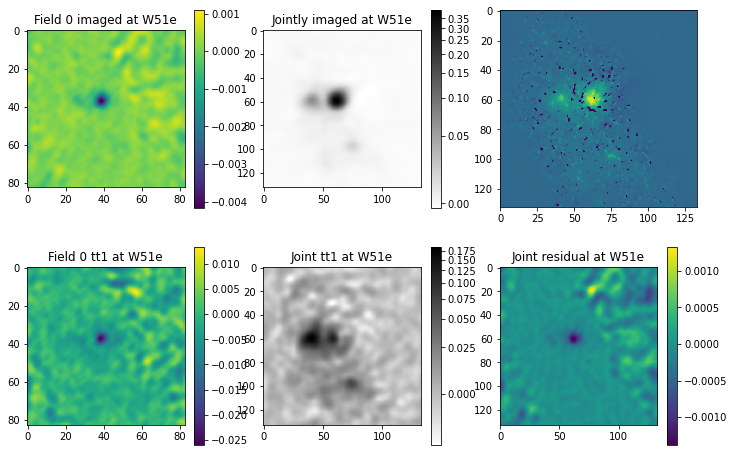

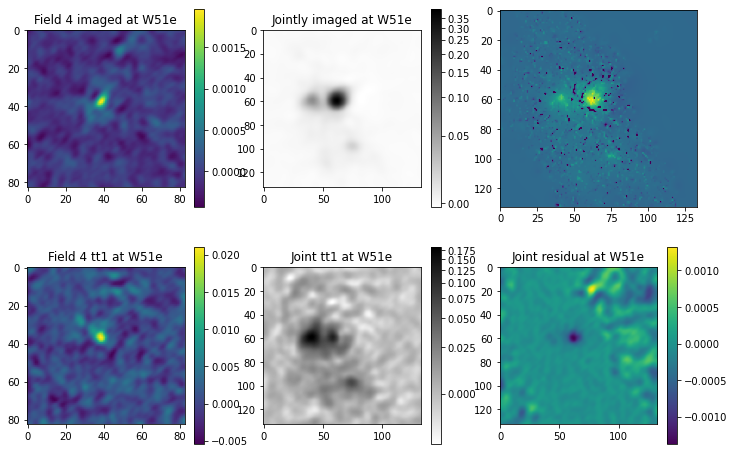

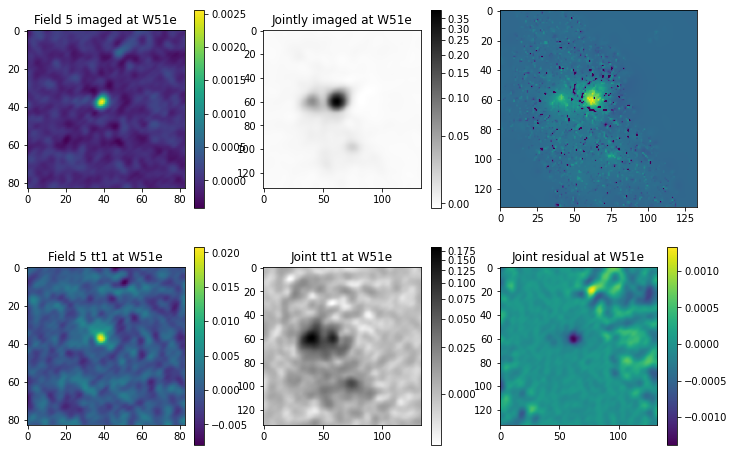

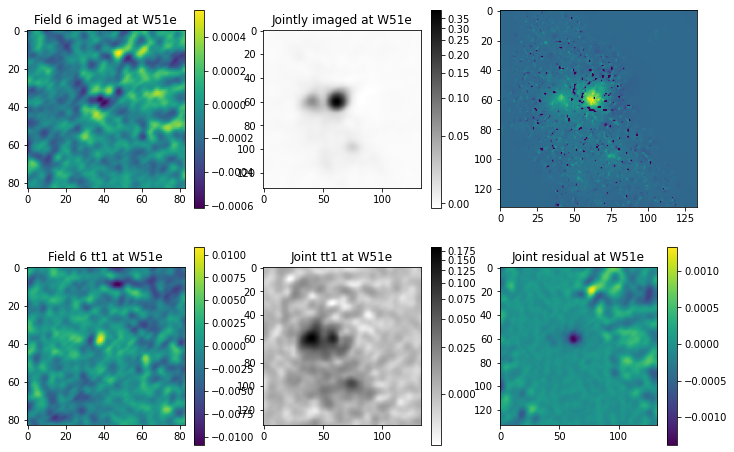

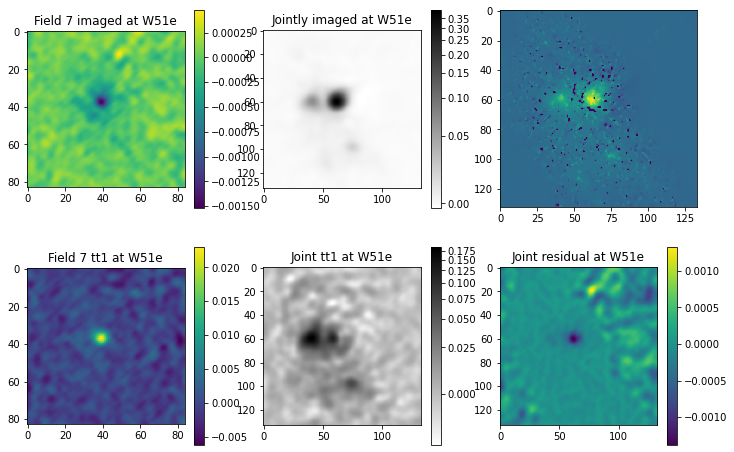

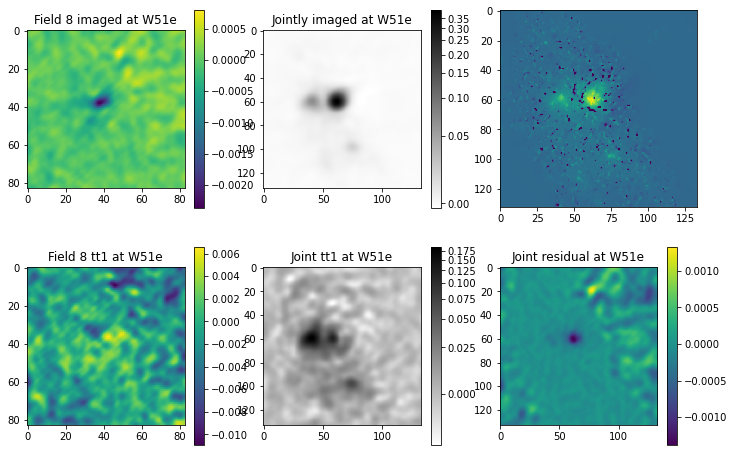

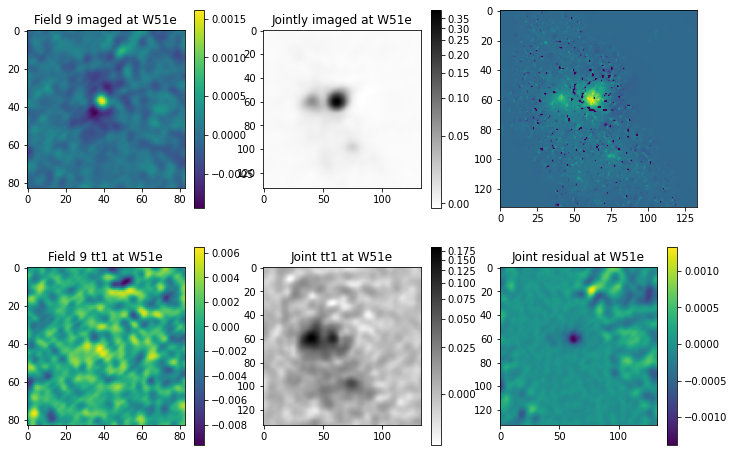

In [21]:
for field in range(10):
    #cutoutregion = 'fk5; box(19:23:43.90,+14:30:34.8,5",5")'
    eximname = f'experiment_tcleanrestore_uvsub_field{field}'
    if os.path.exists(f'{image_path}/{eximname}.image.tt0'):
        pl.figure(figsize=(12,8))
        image_ = SpectralCube.read(f'{image_path}/{eximname}.image.tt0', format='casa_image').subcube_from_ds9region(cutoutregion)
        pl.subplot(2,3,1);  pl.imshow(image_[0].value); pl.title(f"Field {field} imaged at W51e"); pl.colorbar(mappable=pl.gca().images[0])
        resid_ = SpectralCube.read(f'{image_path}/{eximname}.residual.tt0', format='casa_image').subcube_from_ds9region(cutoutregion)
        #pl.subplot(2,3,2);  pl.imshow(resid_[0].value); pl.title(f"Field {field} residual"); pl.colorbar(mappable=pl.gca().images[0])
        #model = SpectralCube.read(f'{image_path}/{eximname}.model.tt0', format='casa_image').subcube_from_ds9region(cutoutregion)
        pl.subplot(2,3,3).imshow(model[0].value, norm=simple_norm(model[0].value, stretch='log', max_percent=99.995, min_percent=1));
        imagett1_ = SpectralCube.read(f'{image_path}/{eximname}.image.tt1', format='casa_image').subcube_from_ds9region(cutoutregion)
        pl.subplot(2,3,4);  pl.imshow(imagett1_[0].value); pl.title(f"Field {field} tt1 at W51e"); pl.colorbar(mappable=pl.gca().images[0])
        pl.subplot(2,3,2);  pl.imshow(image[0].value, norm=simple_norm(image[0].value, stretch='asinh'), cmap='gray_r'); pl.title("Jointly imaged at W51e"); pl.colorbar(mappable=pl.gca().images[0])
        pl.subplot(2,3,5);  pl.imshow(imagett1[0].value, norm=simple_norm(imagett1[0].value, stretch='asinh'), cmap='gray_r'); pl.title("Joint tt1 at W51e"); pl.colorbar(mappable=pl.gca().images[0])
        pl.subplot(2,3,6);  pl.imshow(residual[0].value); pl.title("Joint residual at W51e"); pl.colorbar(mappable=pl.gca().images[0])

# Next 

Next experiment: use `ft` instead of `tclean`.

In [22]:
clearcal(experiment_ms_2)
restore_modelcolumn(experiment_ms_2, use_tclean=False)